In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
from datetime import timedelta
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt



***KAGGLE DATASET EXPORT TO GOOGLE COLAB upload the big dataset (>250MB) to read data ***


In [4]:
!pip install -q kaggle

In [6]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"patrickleel","key":"af5770822d7d1c5a4039e3688b854ddc"}'}

In [7]:
! mkdir ~/.kaggle

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!pip install --upgrade --force-reinstall --no-deps kaggle


     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=f5e6fe790379f924075f4c03f8d2adde7788e790c8c633a3346795a2a25d1105
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [13]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16852       1320  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10198        732  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4727        330  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [14]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 78% 78.0M/100M [00:00<00:00, 112MB/s]
100% 100M/100M [00:00<00:00, 107MB/s] 


In [15]:
! unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
btc = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
btc.sample(3)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1496715,1415120820,325.64,325.64,325.1,325.63,1.811416,589.758679,325.578903
246709,1340120460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195688,1337059200,NaN,NaN,NaN,NaN,NaN,NaN,NaN




***Convert timestamp***

In [18]:
btc['Timestamp'] = pd.to_datetime(btc.Timestamp, unit='s')
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


**Find missing %**

In [20]:
btc.isnull().sum().Open / btc.shape[0] * 100

25.602459928475803

***Remove NA value***

In [21]:
btc.dropna(how='any', inplace=True)


In [22]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


**DatetimeIndex**

In [23]:
btc.index = btc.Timestamp
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


***See if one closed up or down each day. And create binary column 0 = loss, 1= gain to have something to predict.***

In [24]:
btc['pos_neg'] = btc['Open']-btc['Close']

In [25]:
btc['Up/Down'] = np.where(btc['pos_neg'] > 0, '0','1')

In [26]:
btc.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
pos_neg                     float64
Up/Down                      object
dtype: object

In [27]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00,1
2011-12-31 15:50:00,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00,1
2011-12-31 16:59:00,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,-0.07,1
2011-12-31 17:00:00,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00,1
2012-01-01 04:16:00,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00,1
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,28.31,0
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,-1.84,1
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,-30.41,1


***Making sure the columns for feature are integer in order to make prediction.***

In [28]:
btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']] = btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']].astype(int)

***Scaling feature***

In [29]:
from sklearn.preprocessing import MinMaxScaler
cols = btc.columns.values
print (cols)

['Timestamp' 'Open' 'High' 'Low' 'Close' 'Volume_(BTC)'
 'Volume_(Currency)' 'Weighted_Price' 'pos_neg' 'Up/Down']


In [30]:
Min_max_scaler = MinMaxScaler()
btc[cols] = Min_max_scaler.fit_transform(btc[cols])
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,0.000000,0.000016,0.000016,0.000049,0.000049,0.000000,1.438779e-07,0.000016,0.387962,1.0
2011-12-31 15:50:00,0.000098,0.000016,0.000016,0.000049,0.000049,0.008201,1.510718e-05,0.000016,0.387962,1.0
2011-12-31 16:59:00,0.000112,0.000016,0.000016,0.000049,0.000049,0.006322,1.230156e-05,0.000016,0.387962,1.0
2011-12-31 17:00:00,0.000113,0.000016,0.000016,0.000049,0.000049,0.001538,2.949498e-06,0.000016,0.387962,1.0
2012-01-01 04:16:00,0.000252,0.000016,0.000016,0.000049,0.000049,0.000171,4.316338e-07,0.000016,0.387962,1.0


***Spliting Data fit into linear regression***

In [31]:
X = btc[['Open','High','Low','Close']]
y = btc['Up/Down']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=0)

***Linear regression***


In [33]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [34]:
predictions1 = model_lr.predict(X_test)

In [35]:
print('Accuracy of linear regression classifier on test set:\
      {:.2f}'.format(model_lr.score(X_test,y_test)))

Accuracy of linear regression classifier on test set:      0.13


***Logistic regression***






In [37]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [38]:
predictions = model_log.predict(X_test)

In [39]:
print('Accuracy of logistic regression classifier on training set:\
      {:.2f}'.format(model_log.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set:\
      {:.2f}'.format(model_log.score(X_test,y_test)))

Accuracy of logistic regression classifier on training set:      0.63
Accuracy of logistic regression classifier on test set:      0.63


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 19993 378855]
 [ 20526 664757]]


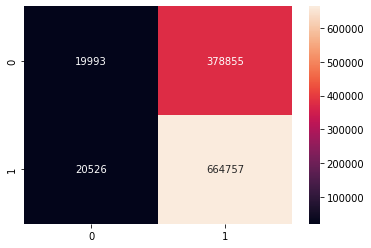

In [44]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, predictions)
sns.heatmap(M, annot=True, fmt='d')
plt.show()

Conclusion
The confusion matrix telling us the model predicted 19993 zeros which means loss and 664757 ones which are gain correctly. 20526 values predicted wrongly.

In [62]:
btc_day = btc.resample('D').mean()

In [64]:
for i, r in btc_day.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()

print()
print('Data at 2015-01-05')
print(btc_day.loc['2015-01-05'])

print()
print('Data at 2015-01-09')
print(btc_day.loc['2015-01-09'])

2015-01-06 00:00:00
Timestamp           NaN
Open                NaN
High                NaN
Low                 NaN
Close               NaN
Volume_(BTC)        NaN
Volume_(Currency)   NaN
Weighted_Price      NaN
pos_neg             NaN
Weight              NaN
last_Open           NaN
last_High           NaN
last_Low            NaN
last_Close          NaN
last_Weight         NaN
Name: 2015-01-06 00:00:00, dtype: float64

2015-01-07 00:00:00
Timestamp           NaN
Open                NaN
High                NaN
Low                 NaN
Close               NaN
Volume_(BTC)        NaN
Volume_(Currency)   NaN
Weighted_Price      NaN
pos_neg             NaN
Weight              NaN
last_Open           NaN
last_High           NaN
last_Low            NaN
last_Close          NaN
last_Weight         NaN
Name: 2015-01-07 00:00:00, dtype: float64

2015-01-08 00:00:00
Timestamp           NaN
Open                NaN
High                NaN
Low                 NaN
Close               NaN
Volume_(BTC)  

In [68]:
missing_replacement = btc['2015-01-05': '2015-01-09'].mean(numeric_only=True)
btc_day.loc['2015-01-06'] = missing_replacement
btc_day.loc['2015-01-07'] = missing_replacement
btc_day.loc['2015-01-08'] = missing_replacement

# Any missing value?
btc_day.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
pos_neg              0
Weight               0
last_Open            0
last_High            0
last_Low             0
last_Close           0
last_Weight          0
dtype: int64

In [70]:
btc_halving1 = btc_day.loc['2014-12-30':'2015-01-13']
btc_halving2 = btc_day.loc['2017-12-30':'2018-01-13']
btc_halving3 = btc_day.loc['2019-12-30':'2020-01-13']
btc_test = btc_day.loc['2020-05-11':]

In [72]:
print(
    btc_day.shape,
    btc_halving1.index.values.shape, 
    btc_halving2.index.values.shape, 
    btc_halving3.index.values.shape,
    btc_test.index.values.shape,
)

(3379, 15) (15,) (15,) (15,) (325,)


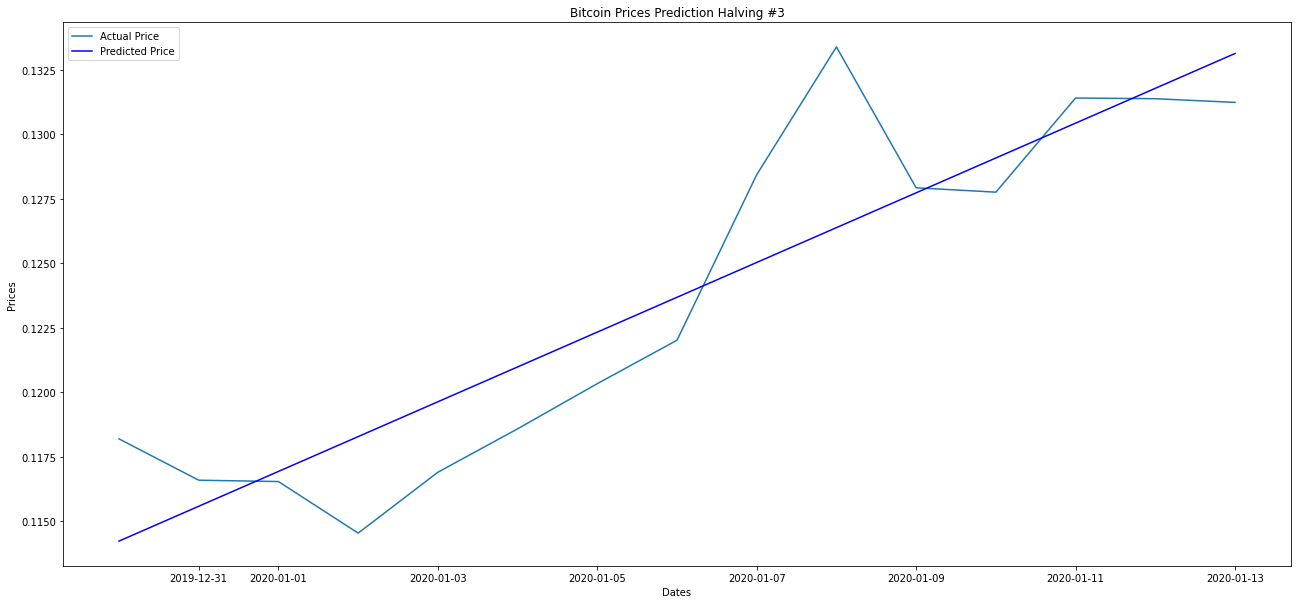

[array([1.577664e+18]), array([1.5788736e+18])]
[[1.56266917e-17]] [-24.53943243]
[0.11423645] [0.13313849]


In [90]:
reg_halving3 = LinearRegression()
X = btc_halving3.index.values.reshape(-1, 1)
y = btc_halving3.Weighted_Price.values.reshape(-1, 1)
reg_halving3.fit(X, y)

plt.figure(figsize=(22, 10))
plt.title('Bitcoin Prices Prediction Halving #3')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(X, y, label='Actual Price')
x_halving_float3 = [X[0].astype('float'), X[-1].astype('float')]
x_halving_date3 = [X[0], X[-1]]
predict_halving3 = reg_halving3.predict(x_halving_float3)
plt.plot(x_halving_date3, predict_halving3, 'blue', label='Predicted Price')
plt.legend()
plt.show()
print([X[0].astype('float'), X[-1].astype('float')])
print(reg_halving3.coef_, reg_halving3.intercept_)
print(predict_halving3[0], predict_halving3[1])

In [101]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

The Training Accuracy is:  0.9999996310405579
The Testing Accuracy is:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2710324
           1       0.00      0.00      0.00         1

    accuracy                           1.00   2710325
   macro avg       0.50      0.50      0.50   2710325
weighted avg       1.00      1.00      1.00   2710325



LogisticRegression()

In [82]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(X_test)

In [83]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[0.54343904 0.56428416 0.54419675 0.5624616 ]]
[-15.10732686]


In [84]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[903442]])

In [94]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[0.54343904, 0.56428416, 0.54419675, 0.5624616 ]])

In [92]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [100]:
LogR = LogisticRegression()
LogR.fit(X,np.ravel(y.astype(int)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(x,LogR.predict_proba(x)[:,1])
plt.xlabel("Predictors")
plt.ylabel("Probability of interesting for the study")

ValueError: ignored